# 1. 
Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [1]:
import numpy as np
min05 = [a[np.abs(a-0.5).argmin()] for a in np.random.random((10,3))]
print(min05)

[0.5628120108495165, 0.3507122535960677, 0.42593532343599827, 0.6442499683185292, 0.4958543593190715, 0.20085082021593326, 0.37726321240949734, 0.5682403806777673, 0.7568004013869037, 0.5081399872120322]


# 2. 
Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [2]:
x2 = np.random.random((6,6))
print(x2)
np.asarray([np.sum(x) for x in x2])/np.asarray([min(x) for x in zip(*x2)])

[[0.54681205 0.32776892 0.97660527 0.13400759 0.99388067 0.48914909]
 [0.22495174 0.23589978 0.98406068 0.8335071  0.40019151 0.16342616]
 [0.50289233 0.05487309 0.46993354 0.94172932 0.58397001 0.91095128]
 [0.8556622  0.99985741 0.57894522 0.60019608 0.18592584 0.86275257]
 [0.62353159 0.67098787 0.12045946 0.05311956 0.01058059 0.21853608]
 [0.55902801 0.40826016 0.2749315  0.93979868 0.17654809 0.934387  ]]


array([ 15.41763427,  51.79290872,  28.75946351,  76.87072859,
       160.40842992,  20.14948747])

# 3. 
На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [3]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(max(np.array([x[i] for i in range (1,9) if x[i-1] == 0])))

5


# 4. 
Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [4]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for j in i:
    x[j]+=1
print (x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [5]:
np.arange(10).reshape((2, 5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# 5. 
Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать не более двух циклов while (for).

In [6]:
def index_points(points, vertex):     # индекс до ближайшего центра
    index=np.empty(len(points[:,0]))
    index=np.asarray([np.argmin(np.sum((points[i]-vertex)**2,axis=1)).astype(int) for i in range (len(points[:,0]))])
    return index
               
def new_vertex(points, vertex, index):   # новые центры из средних арифметических в кластерах
    nvertex=np.empty((len(vertex),2))
    nvertex=np.asarray ([np.mean(points[index==i], axis=0) for i in range (len(vertex))])
    return nvertex

def kmeans(points, k_or_guess):
    if type(k_or_guess)==int:
        index=np.random.choice(len(points[:,0]), k_or_guess, replace=False)
        vertex=points[index]
    else:
        vertex=k_or_guess
    x=index_points (points, vertex)
    nvertex=new_vertex (points,vertex,x)
    while (np.allclose(vertex, nvertex)==0):
        vertex=nvertex
        x=index_points (points, vertex)
        nvertex=new_vertex (points,vertex,x)
    distortion =0.0
    for i in range(len(points)):
        distortion=distortion+(np.sum((points[i]-vertex[x[i].astype(int)])**2))**0.5
    distortion=distortion/len(points[:,0])
    return vertex, distortion   


# 6. 
С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [25]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)

In [26]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

# возраст-доход

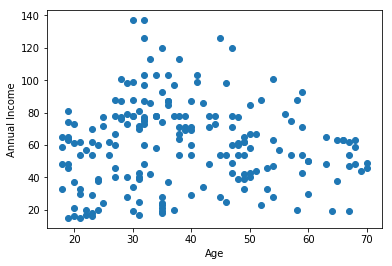

In [30]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 2], data[:, 3])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

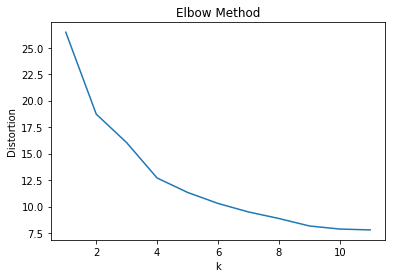

In [31]:
points=np.column_stack((data[:, 2],data[:, 3]))
distortion=np.asarray ([kmeans (points, i)[1] for i in range (1,12)])
plt.plot(range(1,12), distortion)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

k=4

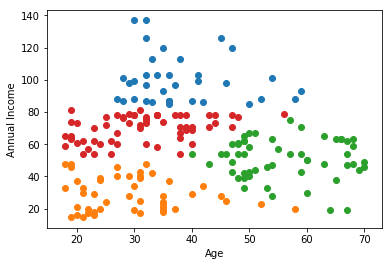

In [11]:
k=4
index=index_points (points, kmeans (points, k) [0])
for i in range(k):
    plt.scatter(points[index==i, 0], points[index==i, 1])
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

# возраст-покупательский индекс

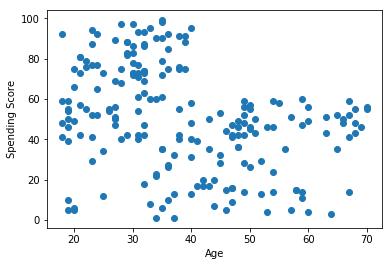

In [12]:
plt.scatter(data[:, 2], data[:, 4])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

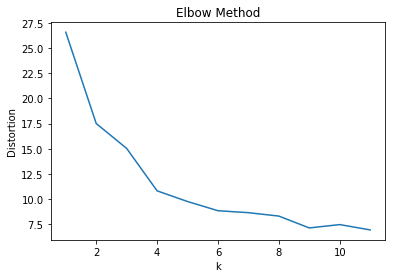

In [13]:
points=np.column_stack((data[:, 2],data[:, 4]))
distortion=np.asarray ([kmeans (points, i)[1] for i in range (1,12)])
plt.plot(range(1,12), distortion)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

k=4

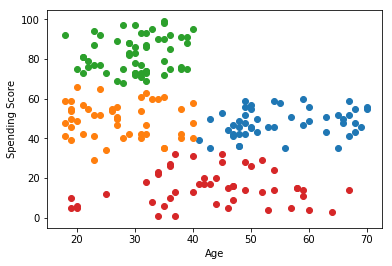

In [14]:
k=4
index=index_points (points, kmeans (points, k) [0])
for i in range(k):
    plt.scatter(points[index==i, 0], points[index==i, 1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

# доход-покупательский индекс

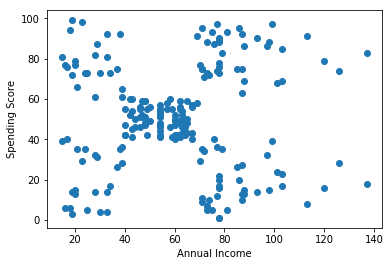

In [15]:
plt.scatter(data[:, 3], data[:, 4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

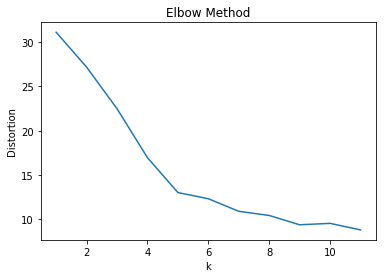

In [33]:
points=np.column_stack((data[:, 3],data[:, 4]))
distortion=np.asarray ([kmeans (points, i)[1] for i in range (1,12)])
plt.plot(range(1,12), distortion)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

k=5

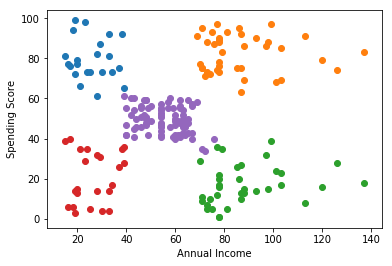

In [17]:
k=5
index=index_points (points, kmeans (points, k) [0])
for i in range(k):
    plt.scatter(points[index==i, 0], points[index==i, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# интерпретация

1) можно поделить покупателей на 4 группы: молодые с низким доходом, молодые со средним доходом, молодые с высоким доходом и пожилые
2) люди до 40 чаще ходят в магазины и тратят больше, следовательно, покупательский индекс больше. в пожилом возрасте уже столько покупок не совершается
3) люди с большим доходом и маленьким либо тратят много, либо тратят мало (людей с большим и маленьким покупательским индексами в каждой группе "по доходу" примерно одинаково), со средним доходом - имеют средний покупательский индекс